In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert4/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert4/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert4/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert4/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,3
1,4
2,5
3,3
4,5
...,...
1855,4
1856,3
1857,5
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,4.600655e-06,0.000157,9.997899e-01,0.000012,1.032134e-06,0.000035,9.054683e-07,9.213522e-11,6.929899e-01,1.326010e-04,2.952529e-01,1.162368e-02
1,4.257174e-06,0.000003,8.445079e-06,0.005218,9.794852e-05,0.994668,2.149902e-08,7.843706e-07,9.558252e-06,9.528995e-07,4.035396e-07,9.999883e-01
2,1.291070e-06,0.000097,9.998935e-01,0.000002,1.729752e-07,0.000006,2.463840e-07,1.604680e-05,9.492878e-01,1.498522e-04,1.817268e-04,5.036429e-02
3,1.267258e-06,0.000001,1.642191e-05,0.000334,1.060658e-04,0.999541,2.476359e-12,3.181673e-20,1.301923e-09,9.551988e-09,1.599870e-07,9.999999e-01
4,5.767955e-05,0.999416,1.630818e-04,0.000330,3.037682e-05,0.000002,1.207815e-14,1.000000e+00,1.163998e-08,3.423513e-15,1.462046e-12,5.542384e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
202,9.926456e-01,0.002794,1.416627e-06,0.004482,1.063430e-05,0.000067,6.620331e-01,3.090378e-01,8.573449e-05,1.363977e-02,1.499404e-02,2.095360e-04
203,9.668189e-01,0.004124,1.504883e-06,0.028835,3.340599e-05,0.000186,9.956704e-01,3.310483e-04,2.700433e-03,1.152585e-03,1.331307e-04,1.232870e-05
204,6.655590e-07,0.000033,1.857604e-07,0.000006,9.999404e-01,0.000019,1.291904e-11,1.270171e-13,2.590350e-08,2.695536e-09,9.998796e-01,1.203977e-04
205,3.019764e-07,0.000008,2.230916e-06,0.000057,9.993665e-01,0.000566,3.476416e-12,6.823733e-11,9.893400e-01,2.912820e-09,1.065918e-02,7.683245e-07


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,6.563866e-06,3.023613e-04,3.476024e-06,0.999369,0.000005,0.000313,7.118237e-11,4.275941e-13,5.818291e-13,9.999392e-01,7.229541e-09,6.074523e-05
1,6.660532e-07,1.111468e-05,4.777901e-07,0.000003,0.999941,0.000044,7.413488e-16,7.650040e-17,1.922507e-06,1.123869e-15,9.999981e-01,1.385700e-09
2,3.196978e-06,1.084502e-06,6.119757e-05,0.000540,0.000130,0.999265,1.758199e-16,8.524090e-23,4.244590e-09,9.078223e-20,2.119835e-06,9.999979e-01
3,1.672899e-04,3.690411e-05,7.654433e-06,0.996621,0.000001,0.003166,5.098788e-09,4.011979e-18,2.702849e-19,1.000000e+00,2.130679e-12,1.804896e-09
4,6.228225e-06,2.223077e-06,1.080643e-04,0.000279,0.000155,0.999449,9.727850e-17,8.955978e-16,9.544772e-10,6.929045e-12,7.811868e-09,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2.267656e-06,5.500071e-05,6.257817e-05,0.000025,0.999060,0.000795,5.674626e-12,1.665472e-10,1.155466e-08,3.783825e-11,9.999992e-01,8.919573e-07
1856,5.436857e-06,4.640588e-05,2.539234e-07,0.999771,0.000002,0.000175,7.438766e-13,1.396276e-11,3.158646e-13,9.994886e-01,1.764659e-10,5.114353e-04
1857,2.219884e-06,1.371802e-06,1.270682e-05,0.001495,0.000036,0.998452,1.034732e-06,7.297560e-12,4.155130e-03,1.771651e-06,5.884054e-04,9.952537e-01
1858,1.302802e-06,1.391211e-06,2.840016e-05,0.000200,0.000314,0.999455,1.126768e-11,1.225455e-09,2.025999e-01,1.614645e-09,7.940712e-01,3.328925e-03


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([3, 4, 5, ..., 5, 5, 5]), (1860,))

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

knn = KNeighborsClassifier(n_neighbors=50)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 17}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9978494623655914

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=17)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
predictions

array([2, 5, 2, 5, 1, 1, 5, 1, 5, 5, 1, 2, 3, 1, 4, 2, 2, 3, 0, 1, 3, 2,
       3, 5, 3, 2, 4, 1, 4, 4, 1, 3, 0, 1, 2, 1, 4, 1, 4, 2, 4, 3, 1, 3,
       1, 4, 3, 3, 1, 4, 5, 2, 2, 3, 1, 2, 2, 1, 1, 1, 5, 1, 4, 2, 0, 2,
       5, 0, 1, 5, 4, 5, 2, 2, 3, 4, 5, 3, 2, 2, 2, 5, 2, 5, 4, 1, 2, 5,
       0, 4, 2, 4, 5, 4, 3, 4, 5, 4, 4, 1, 0, 4, 1, 4, 3, 4, 1, 1, 5, 0,
       2, 5, 2, 1, 4, 4, 5, 0, 4, 2, 1, 3, 0, 3, 1, 3, 2, 2, 4, 3, 5, 1,
       4, 4, 0, 2, 2, 2, 4, 4, 1, 2, 0, 4, 1, 4, 4, 2, 2, 4, 2, 3, 4, 0,
       2, 5, 5, 4, 4, 1, 1, 5, 1, 1, 5, 1, 4, 4, 1, 5, 2, 4, 0, 0, 4, 1,
       0, 2, 5, 1, 4, 5, 5, 4, 3, 1, 3, 3, 0, 5, 2, 2, 1, 4, 2, 5, 0, 3,
       3, 2, 2, 3, 0, 0, 4, 4, 5])

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.93      0.95      0.94        40
           2       1.00      0.96      0.98        45
           3       0.88      0.96      0.92        24
           4       0.93      1.00      0.97        43
           5       0.97      0.86      0.91        36

    accuracy                           0.95       207
   macro avg       0.94      0.95      0.94       207
weighted avg       0.95      0.95      0.95       207

----accuracy score 94.68599033816425 ----


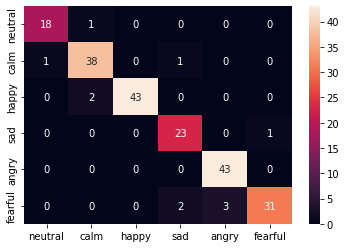

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [25]:
path='/content/drive/My Drive/fusion/fusion_model/KNN/expert4'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
